# CASO MERCADEO


In [62]:
#TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np
#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'DejaVuSerif']
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
#PREPARACIÓN DE DATOS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
#MODELADO
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product
#EVALUACIÓN
from sklearn.metrics import silhouette_score
#ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

## Importar / Cargar Datos

In [63]:
datos = pd.read_csv('data/Datos_Mercadeo.csv', sep = ";")
datos = datos.sample(4000)
datos.head()

Edad   Ingresos  Numero_Compras     Gastos Nivel_Satisfaccion  \
51853  38.1  5912777.8             5.0   994682.7              Medio   
69644  48.5  5127957.4             4.0  1104842.8               Alto   
38911  40.8  6040650.5             7.0   499844.9           Muy_Alto   
64322  43.5  4400358.9             7.0   472187.3               Alto   
58390  38.6  6876699.9             6.0  1473611.7           Muy_Alto   

          Ubicacion Tipo_Cliente  Monto_Compras Genero Captado  \
51853      Medellín        Nuevo         749847  Mujer      Si   
69644   Santa Marta     Habitual         490980  Mujer      No   
38911      Medellín     Habitual         571785  Mujer      Si   
64322  Barranquilla        Nuevo         641204  Mujer      Si   
58390      Medellín        Nuevo         514520  Mujer      No   

       Cantidad_Quejas  
51853                2  
69644                1  
38911                3  
64322                5  
58390                6

## Completitud y tipología de datos


In [64]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 51853 to 49081
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                4000 non-null   float64
 1   Ingresos            4000 non-null   float64
 2   Numero_Compras      4000 non-null   float64
 3   Gastos              4000 non-null   float64
 4   Nivel_Satisfaccion  4000 non-null   object 
 5   Ubicacion           4000 non-null   object 
 6   Tipo_Cliente        4000 non-null   object 
 7   Monto_Compras       4000 non-null   int64  
 8   Genero              4000 non-null   object 
 9   Captado             4000 non-null   object 
 10  Cantidad_Quejas     4000 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 375.0+ KB


## Exploración de datos

In [65]:
#EXPLORACIÓN UNIVARIADA
datos.describe()

Edad      Ingresos  Numero_Compras        Gastos  Monto_Compras  \
count  4000.000000  4.000000e+03     4000.000000  4.000000e+03   4.000000e+03   
mean     42.013050  5.713813e+06        6.993750  7.772235e+05   1.204013e+06   
std       4.956844  1.729478e+06        1.050708  2.377051e+05   4.267728e+05   
min      24.600000  1.871637e+06        3.000000  2.354114e+05   4.587820e+05   
25%      38.600000  4.449187e+06        6.000000  6.074002e+05   8.394590e+05   
50%      42.000000  5.499345e+06        7.000000  7.449178e+05   1.200196e+06   
75%      45.400000  6.671068e+06        8.000000  9.134666e+05   1.572940e+06   
max      59.300000  2.095216e+07       11.000000  2.550844e+06   1.958465e+06   

       Cantidad_Quejas  
count      4000.000000  
mean          3.004750  
std           1.989653  
min           0.000000  
25%           1.000000  
50%           3.000000  
75%           5.000000  
max           6.000000

In [66]:
datos.describe(include = "object")

Nivel_Satisfaccion Ubicacion Tipo_Cliente Genero Captado
count                4000      4000         4000   4000    4000
unique                  5         8            4      2       2
top                  Alto  Medellín        Nuevo  Mujer      Si
freq                 1090       902         1830   2402    2812

## Análisis Gráfico Univariado

Histogramas de frecuencia

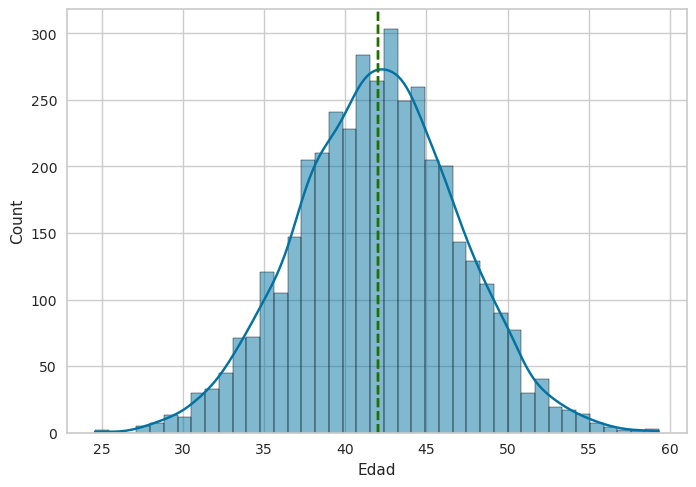

In [67]:
sb.histplot(data = datos, x = "Edad", kde = True)
plt.axvline(x = datos.Edad.mean(), color = "red", linestyle = "dashed")
plt.axvline(x = datos.Edad.median(), color = "green", linestyle = "dashed")
plt.show()

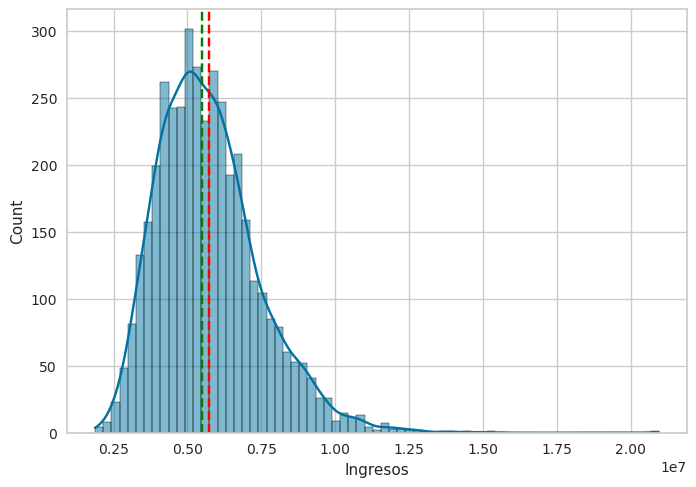

In [68]:
sb.histplot(data = datos, x = "Ingresos", kde = True)
plt.axvline(x = datos.Ingresos.mean(), color = "red", linestyle = "dashed")
plt.axvline(x = datos.Ingresos.median(), color = "green", linestyle = "dashed")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

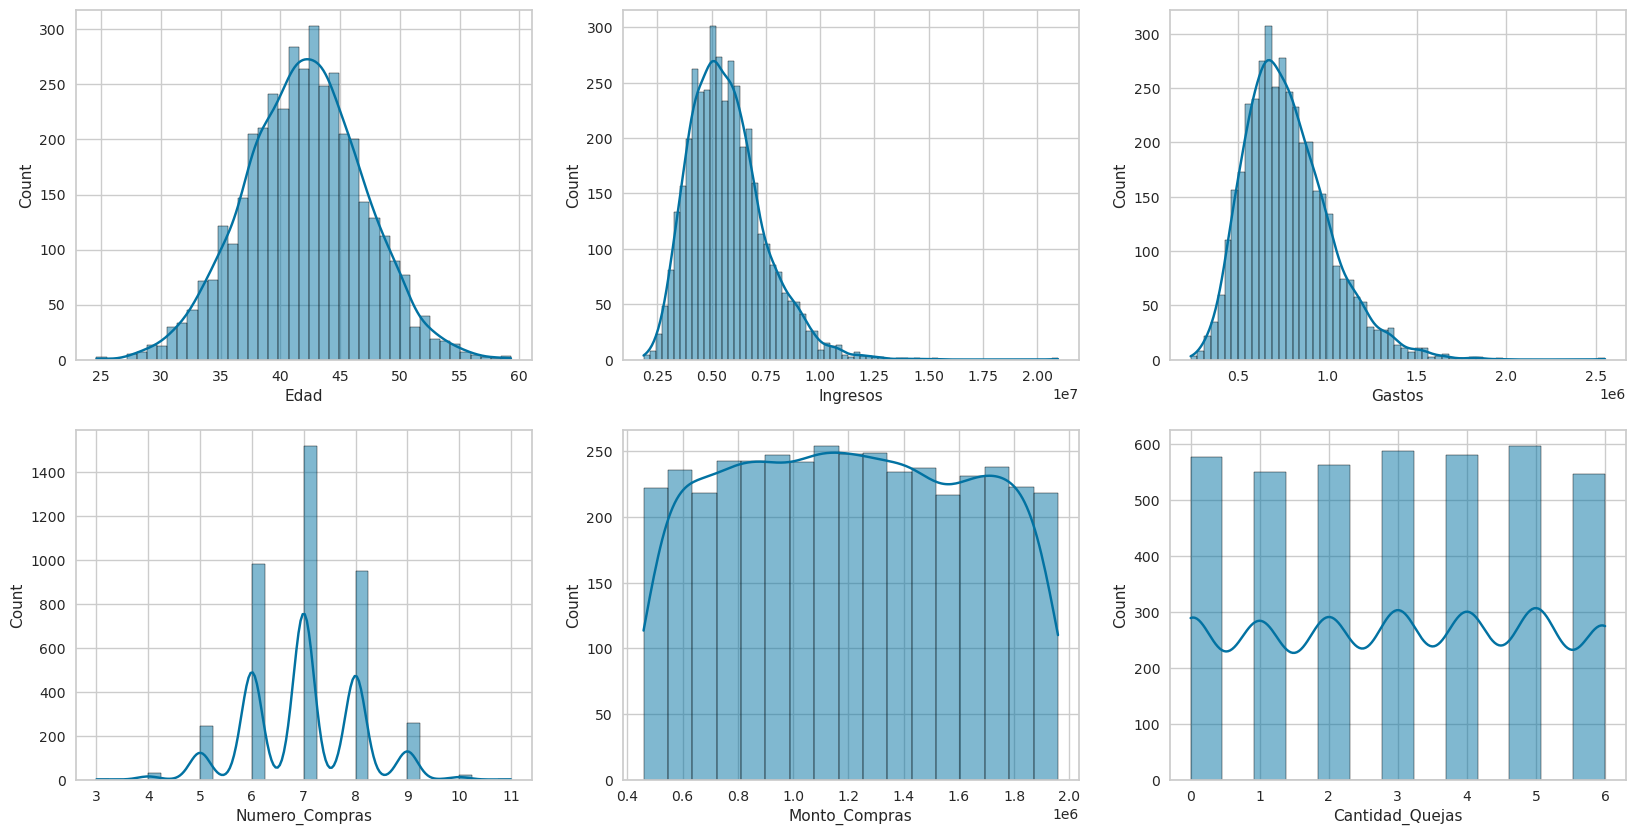

In [69]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
sb.histplot(data = datos, x = "Edad", kde = True, ax = ax[0,0])
sb.histplot(data = datos, x = "Ingresos", kde = True, ax = ax[0,1])
sb.histplot(data = datos, x = "Gastos", kde = True, ax = ax[0,2])
sb.histplot(data = datos, x = "Numero_Compras", kde = True, ax = ax[1,0])
sb.histplot(data = datos, x = "Monto_Compras", kde = True, ax = ax[1,1])
sb.histplot(data = datos, x = "Cantidad_Quejas", kde = True, ax = ax[1,2])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

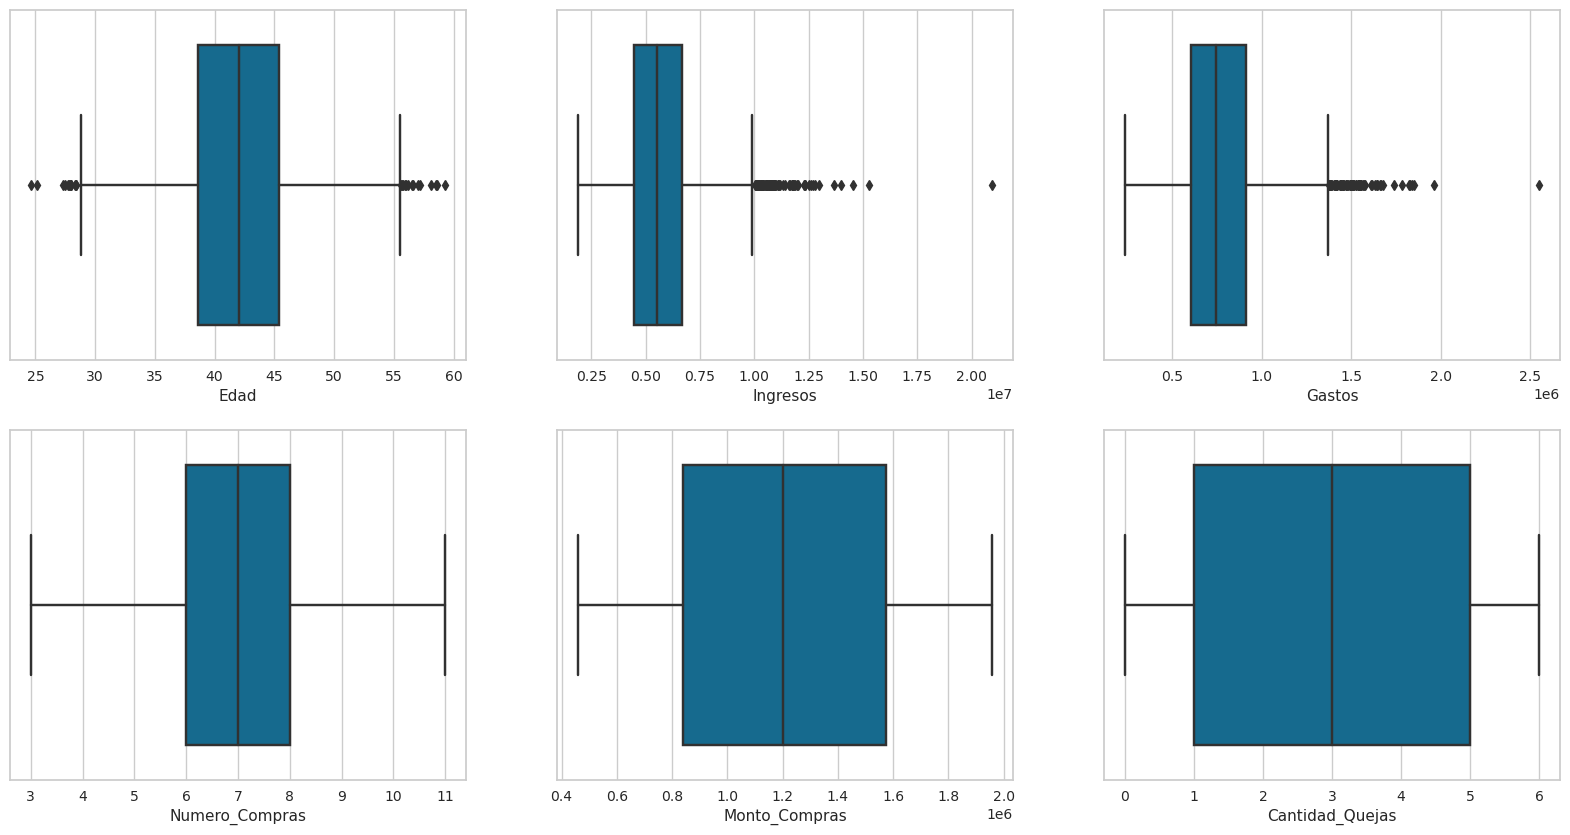

In [70]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
sb.boxplot(data = datos, x = "Edad", ax = ax[0,0])
sb.boxplot(data = datos, x = "Ingresos", ax = ax[0,1])
sb.boxplot(data = datos, x = "Gastos", ax = ax[0,2])
sb.boxplot(data = datos, x = "Numero_Compras", ax = ax[1,0])
sb.boxplot(data = datos, x = "Monto_Compras", ax = ax[1,1])
sb.boxplot(data = datos, x = "Cantidad_Quejas", ax = ax[1,2])
plt.show

### Graficos de relación y proporción

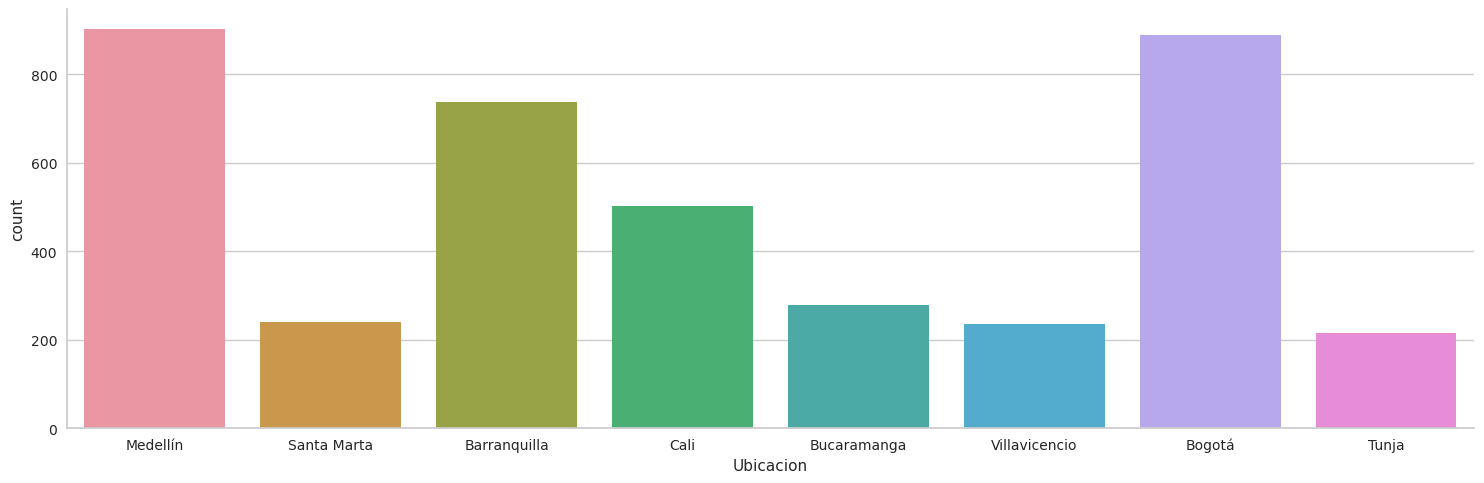

In [71]:
sb.catplot(data = datos, x = "Ubicacion", kind = "count", aspect = 3)
plt.show()

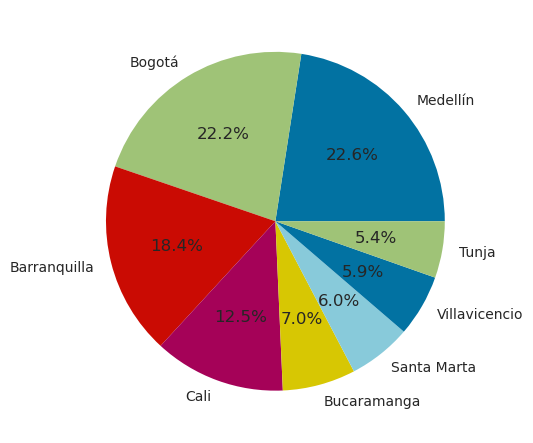

In [72]:
plt.pie(x = datos.Ubicacion.value_counts(), labels = datos.Ubicacion.value_counts().index, autopct = "%0.01f%%")
plt.show()

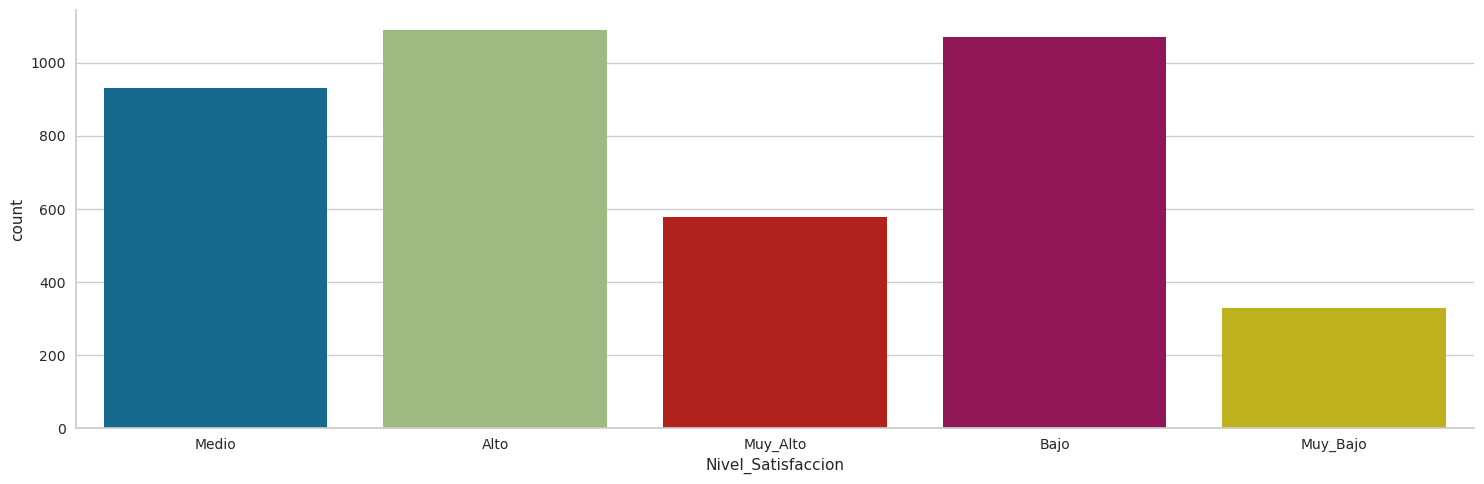

In [73]:
sb.catplot(data = datos, x = "Nivel_Satisfaccion", kind = "count", aspect = 3)
plt.show()

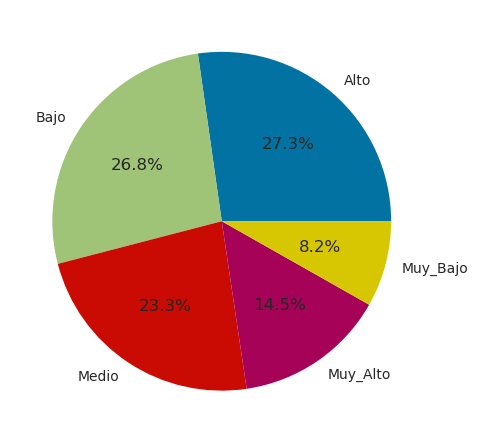

In [74]:
plt.pie(x = datos.Nivel_Satisfaccion.value_counts(), labels = datos.Nivel_Satisfaccion.value_counts().index, autopct = "%0.01f%%")
plt.show()

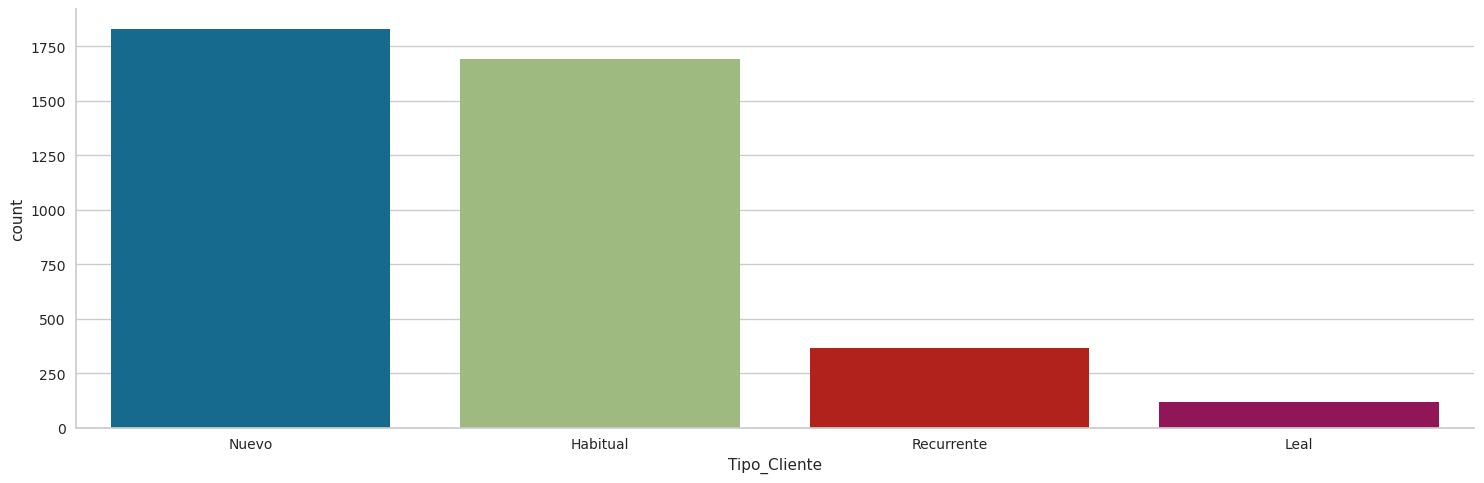

In [75]:
sb.catplot(data = datos, x = "Tipo_Cliente", kind = "count", aspect = 3)
plt.show()

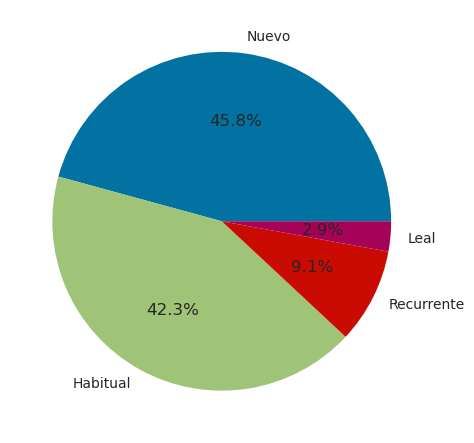

In [76]:
plt.pie(x = datos.Tipo_Cliente.value_counts(), labels = datos.Tipo_Cliente.value_counts().index, autopct = "%0.01f%%")
plt.show()

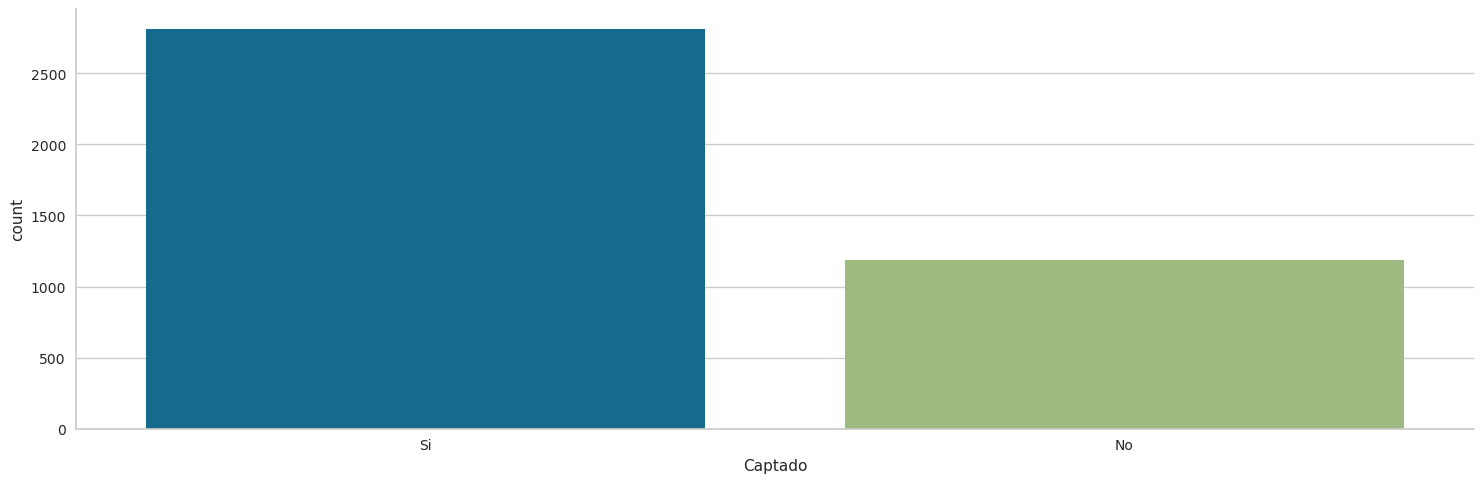

In [77]:
sb.catplot(data = datos, x = "Captado", kind = "count", aspect = 3)
plt.show()

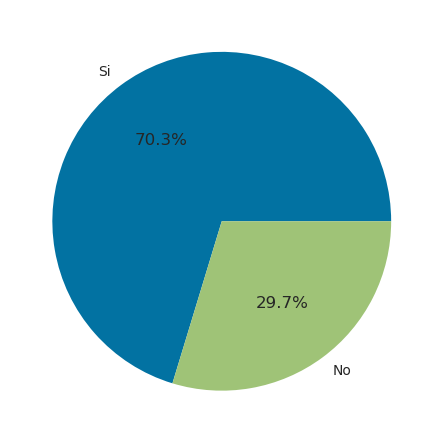

In [78]:
plt.pie(x = datos.Captado.value_counts(), labels = datos.Captado.value_counts().index, autopct = "%0.01f%%")
plt.show()

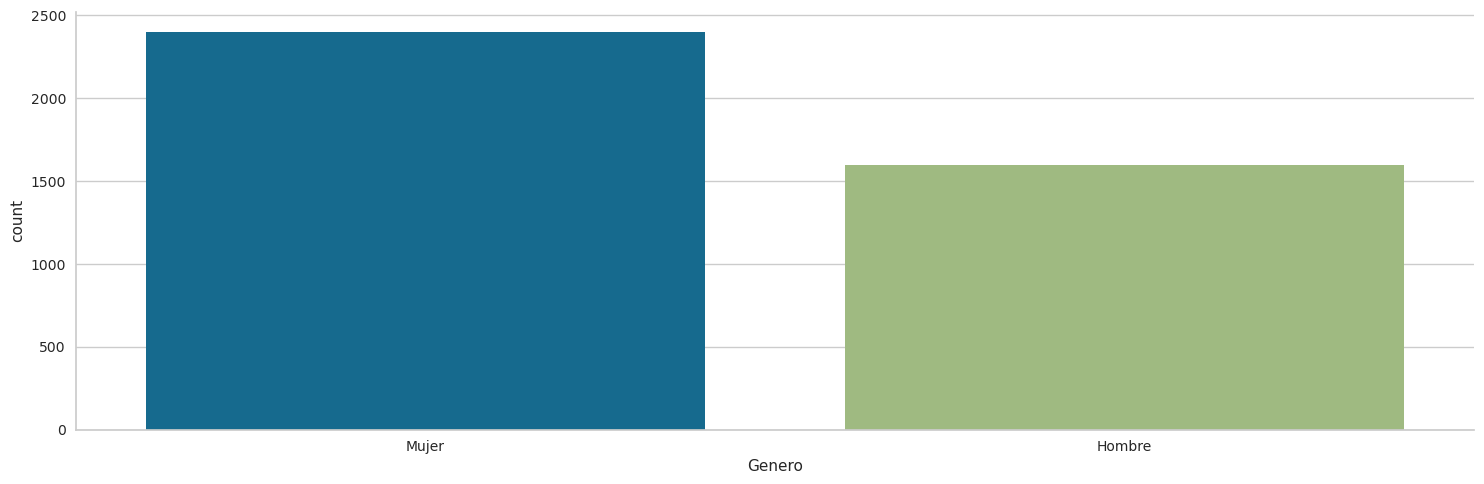

In [79]:
sb.catplot(data = datos, x = "Genero", kind = "count", aspect = 3)
plt.show()

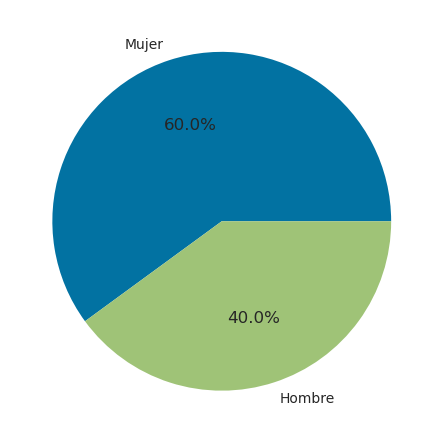

In [80]:
plt.pie(x = datos.Genero.value_counts(), labels = datos.Genero.value_counts().index, autopct = "%0.01f%%")
plt.show()

### Graficos de Dispersión

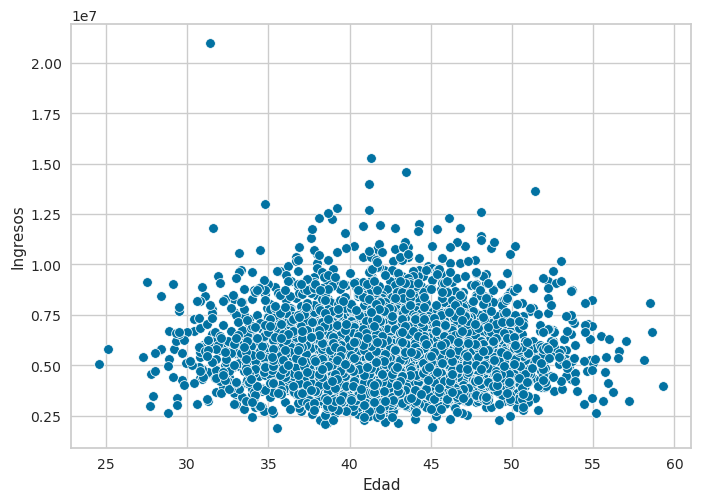

In [81]:
sb.scatterplot(data = datos, x = "Edad", y = "Ingresos")
plt.show()

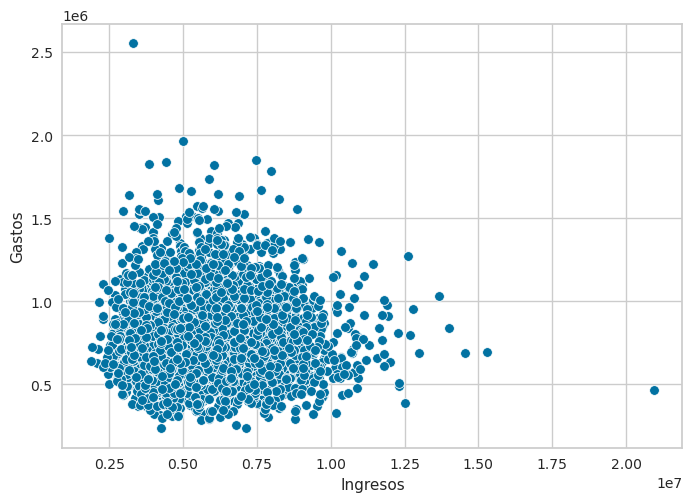

In [82]:
sb.scatterplot(data = datos, x = "Ingresos", y = "Gastos")
plt.show()

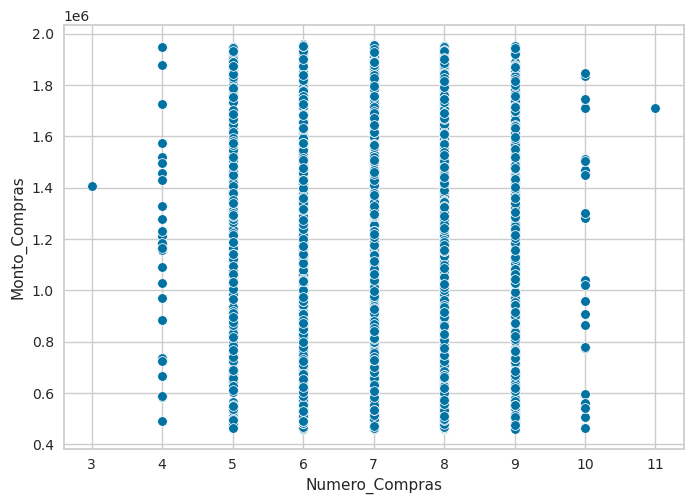

In [83]:
sb.scatterplot(data = datos, x = "Numero_Compras", y = "Monto_Compras")
plt.show()

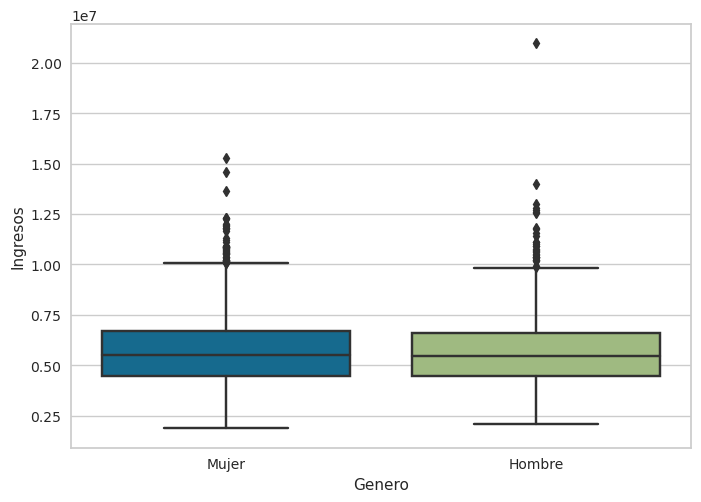

In [84]:
sb.boxplot(data = datos, x = "Genero", y = "Ingresos")
plt.show()

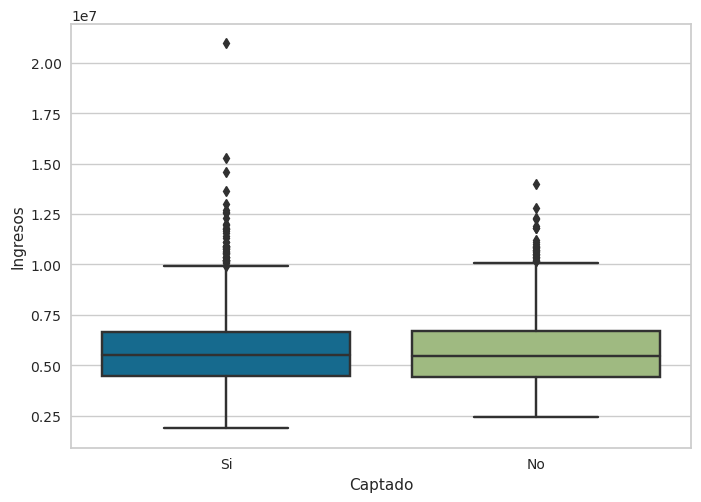

In [85]:
sb.boxplot(data = datos, x = "Captado", y = "Ingresos")
plt.show()

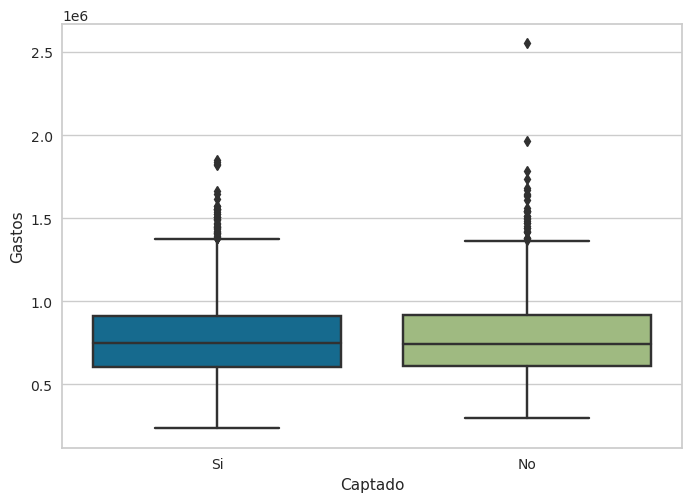

In [86]:
sb.boxplot(data = datos, x = "Captado", y = "Gastos")
plt.show()

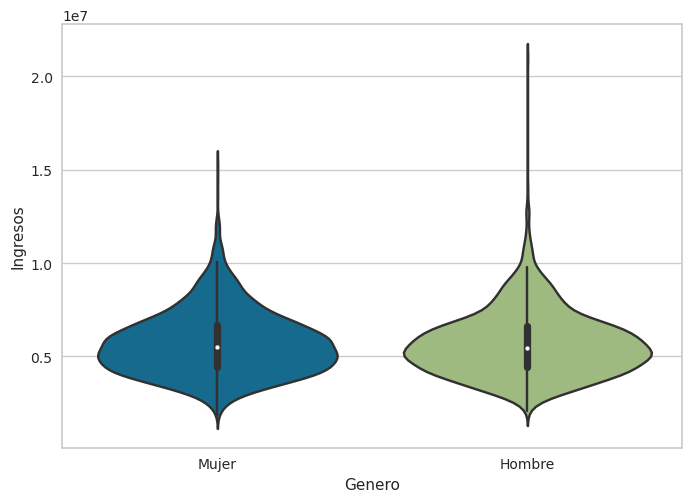

In [87]:
sb.violinplot(data = datos, x = "Genero", y = "Ingresos")
plt.show()

## Análisis Multivariado

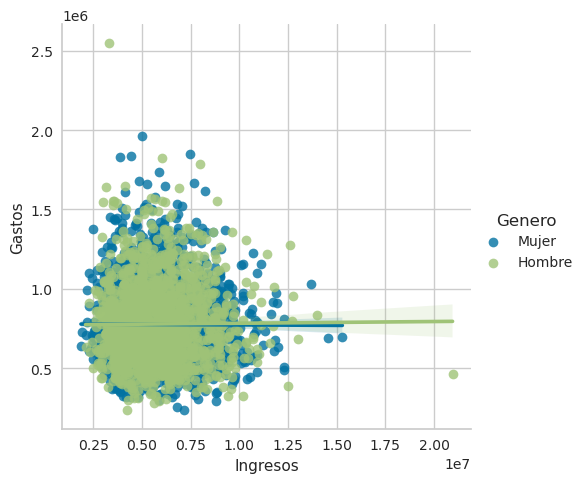

In [88]:
sb.lmplot(data = datos, x = "Ingresos", y = "Gastos", hue = "Genero")
plt.show()

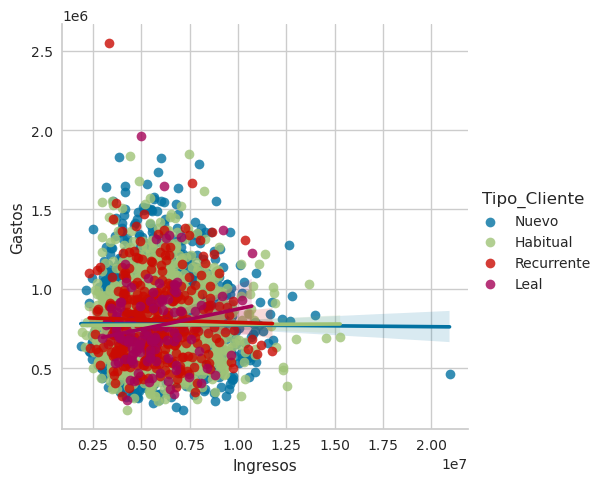

In [89]:
sb.lmplot(data = datos, x = "Ingresos", y = "Gastos", hue = "Tipo_Cliente")
plt.show()

In [90]:
fig = px.scatter_3d(data_frame = datos, x = "Ingresos", y = "Gastos", z = "Edad", color = "Tipo_Cliente")
fig.show()

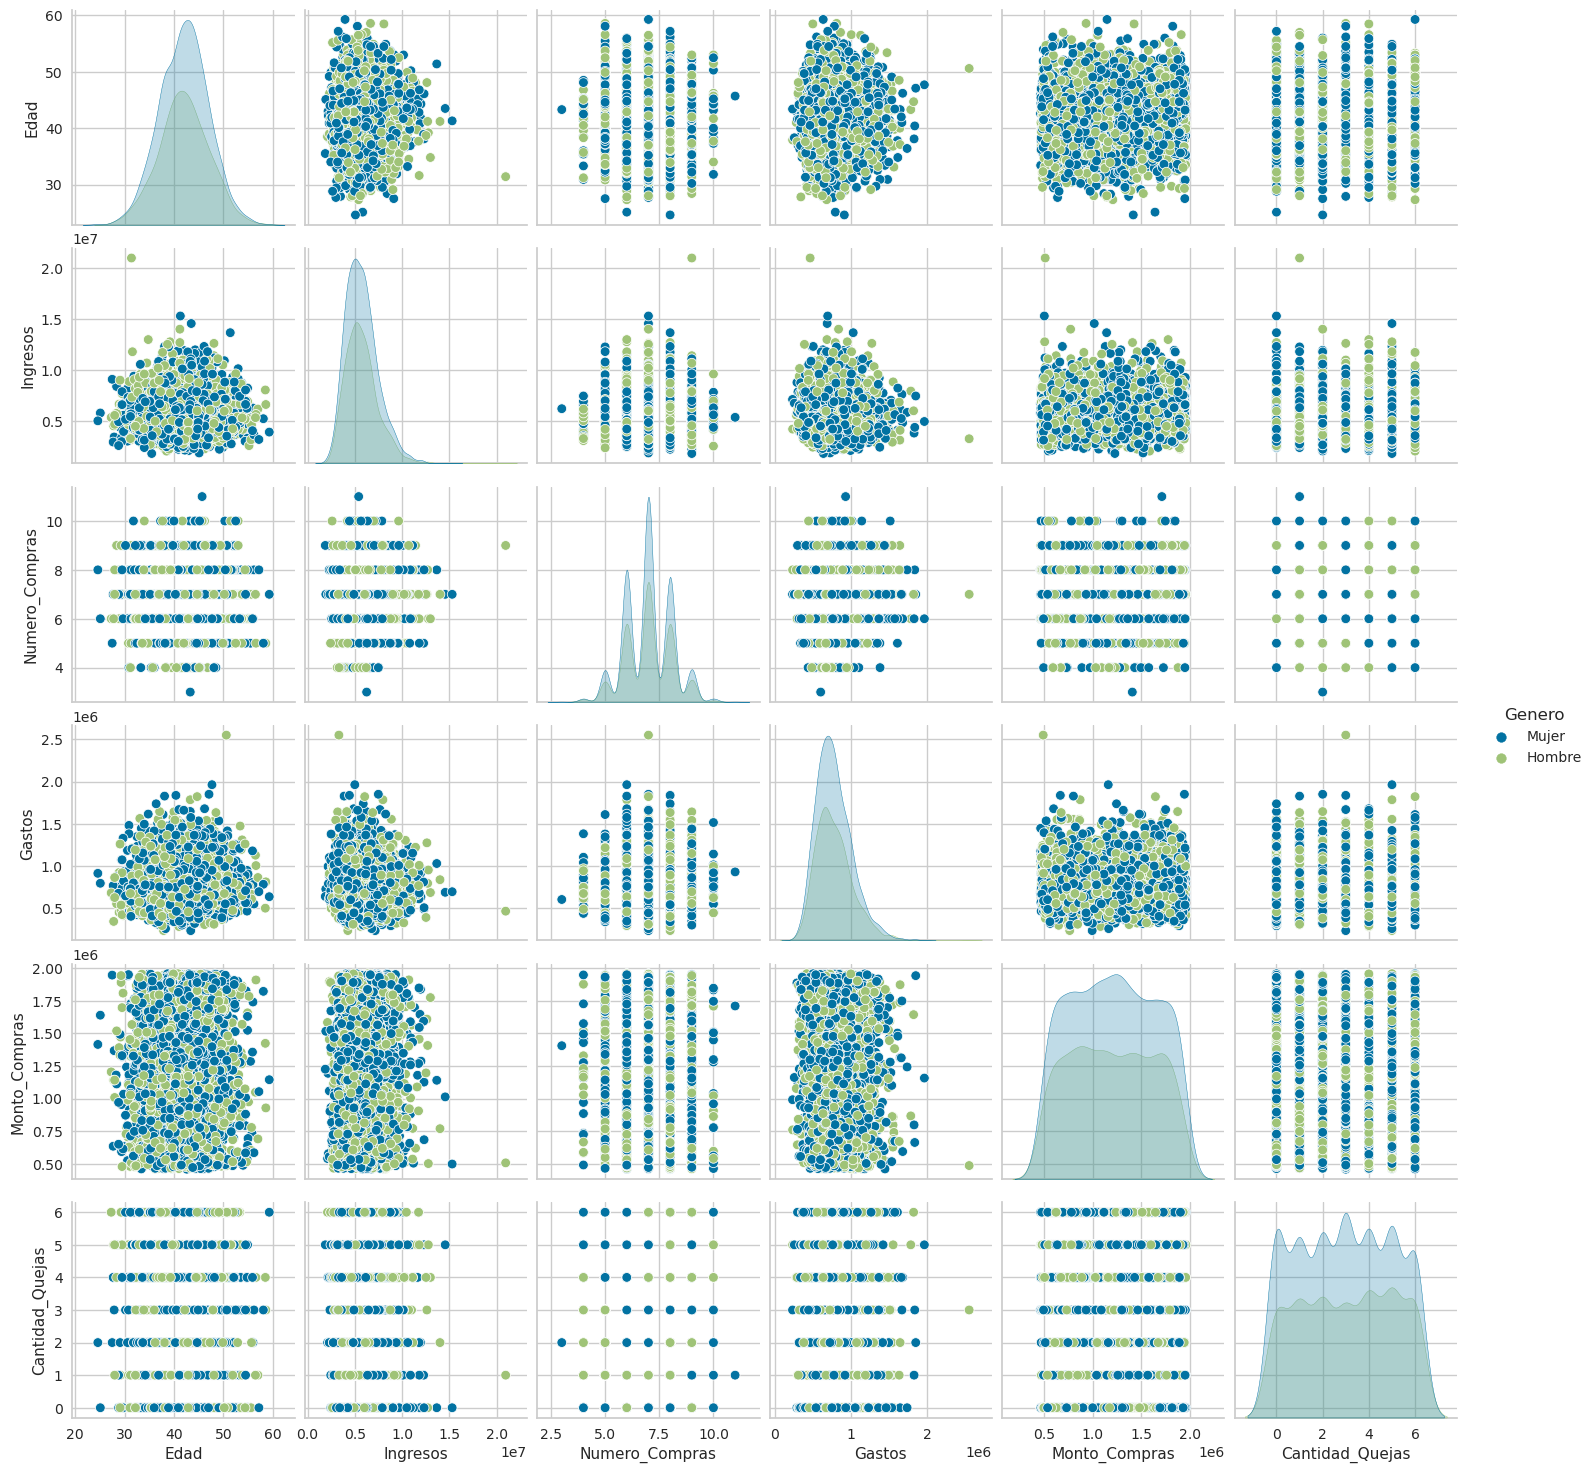

In [91]:
sb.pairplot(data = datos, hue = "Genero")
plt.show()

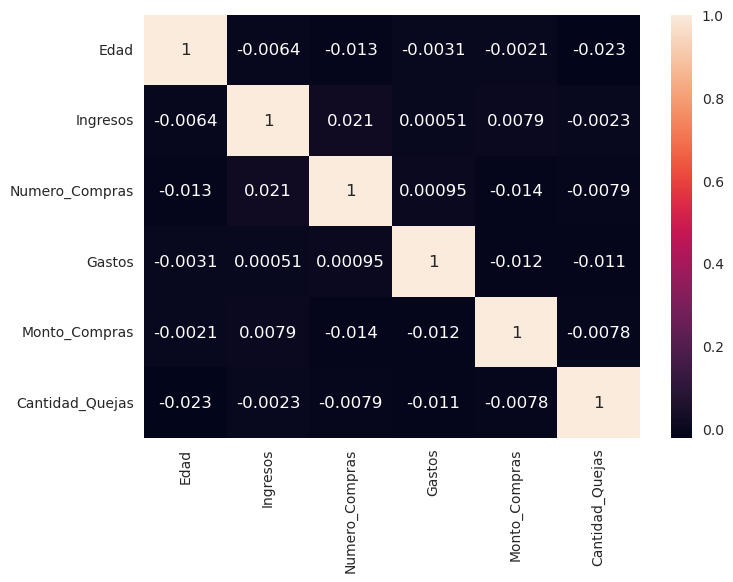

In [92]:
sb.heatmap(datos.corr(numeric_only = True), annot = True)
plt.show()

## **Preparación de datos**

In [93]:
#Separación de variables por tipo
numCols = datos.select_dtypes(include = ['float64', 'int64']).columns.to_list()
catCols = datos.select_dtypes(include = ['object']).columns.to_list()

#Crear los transformadores de variables
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

#Diseñar el transformador de columnas
preprocesador = ColumnTransformer(transformers = [
    ('num', numTransformer, numCols),
    ('cat', catTransformer, catCols)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Edad', 'Ingresos', 'Numero_Compras',
                                  'Gastos', 'Monto_Compras',
                                  'Cantidad_Quejas']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Nivel_Satisfaccion', 'Ubicacion',
                                  'Tipo_Cliente', 'Genero', 'Captado'])])

In [94]:
datosPre = preprocesador.fit_transform(datos)
codCat = preprocesador.named_transformers_['cat']['onehot'].get_feature_names_out(catCols)
labels = np.concatenate([numCols, codCat])
datosPro = pd.DataFrame(datosPre, columns = labels)
datosPro.head(10)

Edad  Ingresos  Numero_Compras    Gastos  Monto_Compras  \
0  0.389049  0.211794           0.250  0.327918       0.194084   
1  0.688761  0.170662           0.125  0.375494       0.021470   
2  0.466859  0.218496           0.500  0.114205       0.075351   
3  0.544669  0.132529           0.500  0.102260       0.121640   
4  0.403458  0.262313           0.375  0.534760       0.037167   
5  0.426513  0.115683           0.625  0.138818       0.558852   
6  0.198847  0.309036           0.500  0.299778       0.104199   
7  0.481268  0.141549           0.500  0.147259       0.380126   
8  0.334294  0.230811           0.375  0.173531       0.582171   
9  0.671470  0.085952           0.500  0.557889       0.253616   

   Cantidad_Quejas  Nivel_Satisfaccion_Alto  Nivel_Satisfaccion_Bajo  \
0         0.333333                      0.0                      0.0   
1         0.166667                      1.0                      0.0   
2         0.500000                      0.0                      0.0   
3         0.833333                      1.0                      0.0   
4         1.000000                      0.0                      0.0   
5         0.833333                      0.0                      1.0   
6         0.500000                      0.0                      0.0   
7         0.500000                      0.0                      1.0   
8         0.166667                      0.0                      0.0   
9         0.500000                      1.0                      0.0   

   Nivel_Satisfaccion_Medio  Nivel_Satisfaccion_Muy_Alto  ...  \
0                       1.0                          0.0  ...   
1                       0.0                          0.0  ...   
2                       0.0                          1.0  ...   
3                       0.0                          0.0  ...   
4                       0.0                          1.0  ...   
5                       0.0                          0.0  ...   
6                       0.0                          1.0  ...   
7                       0.0                          0.0  ...   
8                       0.0                          0.0  ...   
9                       0.0                          0.0  ...   

   Ubicacion_Tunja  Ubicacion_Villavicencio  Tipo_Cliente_Habitual  \
0              0.0                      0.0                    0.0   
1              0.0                      0.0                    1.0   
2              0.0                      0.0                    1.0   
3              0.0                      0.0                    0.0   
4              0.0                      0.0                    0.0   
5              0.0                      0.0                    0.0   
6              0.0                      0.0                    0.0   
7              0.0                      0.0                    1.0   
8              0.0                      0.0                    0.0   
9              0.0                      0.0                    1.0   

   Tipo_Cliente_Leal  Tipo_Cliente_Nuevo  Tipo_Cliente_Recurrente  \
0                0.0                 1.0                      0.0   
1                0.0                 0.0                      0.0   
2                0.0                 0.0                      0.0   
3                0.0                 1.0                      0.0   
4                0.0                 1.0                      0.0   
5                0.0                 1.0                      0.0   
6                0.0                 1.0                      0.0   
7                0.0                 0.0                      0.0   
8                0.0                 1.0                      0.0   
9                0.0                 0.0                      0.0   

   Genero_Hombre  Genero_Mujer  Captado_No  Captado_Si  
0            0.0           1.0         0.0         1.0  
1            0.0           1.0         1.0         0.0  
2            0.0           1.0         0.0         1.0  
3           

In [95]:
datosPro.describe()

Edad     Ingresos  Numero_Compras       Gastos  Monto_Compras  \
count  4000.000000  4000.000000     4000.000000  4000.000000    4000.000000   
mean      0.501817     0.201366        0.499219     0.234000       0.496926   
std       0.142849     0.090641        0.131338     0.102661       0.284575   
min       0.000000     0.000000        0.000000     0.000000       0.000000   
25%       0.403458     0.135088        0.375000     0.160656       0.253838   
50%       0.501441     0.190126        0.500000     0.220048       0.494380   
75%       0.599424     0.251536        0.625000     0.292842       0.742929   
max       1.000000     1.000000        1.000000     1.000000       1.000000   

       Cantidad_Quejas  Nivel_Satisfaccion_Alto  Nivel_Satisfaccion_Bajo  \
count      4000.000000              4000.000000              4000.000000   
mean          0.500792                 0.272500                 0.268000   
std           0.331609                 0.445301                 0.442973   
min           0.000000                 0.000000                 0.000000   
25%           0.166667                 0.000000                 0.000000   
50%           0.500000                 0.000000                 0.000000   
75%           0.833333                 1.000000                 1.000000   
max           1.000000                 1.000000                 1.000000   

       Nivel_Satisfaccion_Medio  Nivel_Satisfaccion_Muy_Alto  ...  \
count               4000.000000                   4000.00000  ...   
mean                   0.233000                      0.14450  ...   
std                    0.422795                      0.35164  ...   
min                    0.000000                      0.00000  ...   
25%                    0.000000                      0.00000  ...   
50%                    0.000000                      0.00000  ...   
75%                    0.000000                      0.00000  ...   
max                    1.000000                      1.00000  ...   

       Ubicacion_Tunja  Ubicacion_Villavicencio  Tipo_Cliente_Habitual  \
count      4000.000000              4000.000000            4000.000000   
mean          0.054000                 0.059000               0.423000   
std           0.226046                 0.235654               0.494097   
min           0.000000                 0.000000               0.000000   
25%           0.000000                 0.000000               0.000000   
50%           0.000000                 0.000000               0.000000   
75%           0.000000                 0.000000               1.000000   
max           1.000000                 1.000000               1.000000   

       Tipo_Cliente_Leal  Tipo_Cliente_Nuevo  Tipo_Cliente_Recurrente  \
count        4000.000000         4000.000000              4000.000000   
mean            0.028750            0.457500                 0.090750   
std             0.167124            0.498253                 0.287289   
min             0.000000            0.000000                 0.000000   
25%             0.000000            0.000000                 0.000000   
50%             0.000000            0.000000                 0.000000   
75%             0.000000            1.000000                 0.000000   
max             1.000000            1.000000                 1.000000   

       Genero_Hombre  Genero_Mujer   Captado_No   Captado_Si  
count    4000.000000   4000.000000  4000.000000  4000.000000  
mean        0.399500      0.600500     0.297000     0.703000  
std         0.489857      0.489857     0.456994     0.456994  
min         0.000000      0.000000     0.000000     0.000000  
25%         0.000000      0.000000     0.000000     0.000000  
50%         0.000000      1.000000     0.000000     1.000000  
75%         1.000000      1.000000     1.000000     1.000000  
max         1.000000      1.000000     1.000000     1.000000  

[8 rows x 27 columns]

In [96]:
datosPro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Edad                         4000 non-null   float64
 1   Ingresos                     4000 non-null   float64
 2   Numero_Compras               4000 non-null   float64
 3   Gastos                       4000 non-null   float64
 4   Monto_Compras                4000 non-null   float64
 5   Cantidad_Quejas              4000 non-null   float64
 6   Nivel_Satisfaccion_Alto      4000 non-null   float64
 7   Nivel_Satisfaccion_Bajo      4000 non-null   float64
 8   Nivel_Satisfaccion_Medio     4000 non-null   float64
 9   Nivel_Satisfaccion_Muy_Alto  4000 non-null   float64
 10  Nivel_Satisfaccion_Muy_Bajo  4000 non-null   float64
 11  Ubicacion_Barranquilla       4000 non-null   float64
 12  Ubicacion_Bogotá             4000 non-null   float64
 13  Ubicacion_Bucarama

## **Modelado**

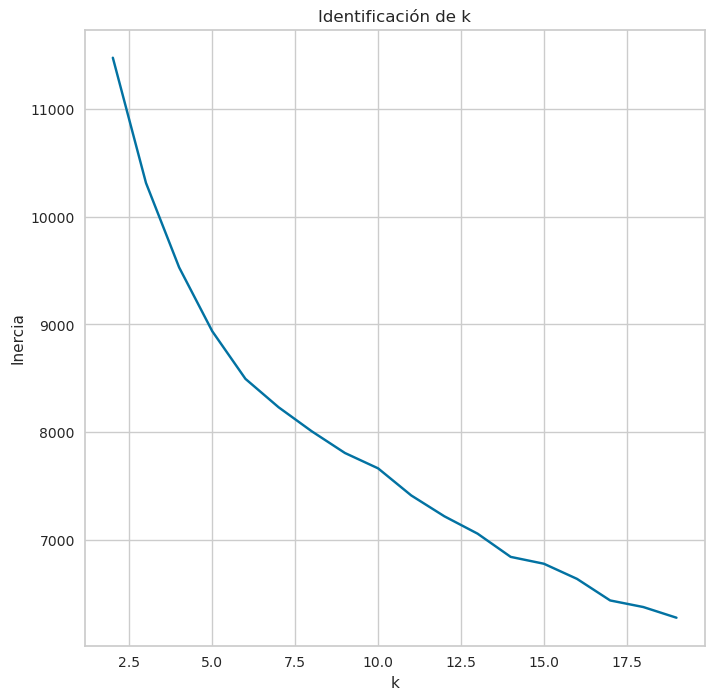

In [97]:
#Método del codo (inercia)
sumDistancia = []
K = range(2, 20)
for k in K:
  km = KMeans(n_clusters = k, random_state = 123)
  km = km.fit(datosPro)
  sumDistancia.append(km.inertia_)

plt.figure(figsize = (8, 8))
plt.plot(K, sumDistancia, 'bx-')
plt.title('Identificación de k')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.show()

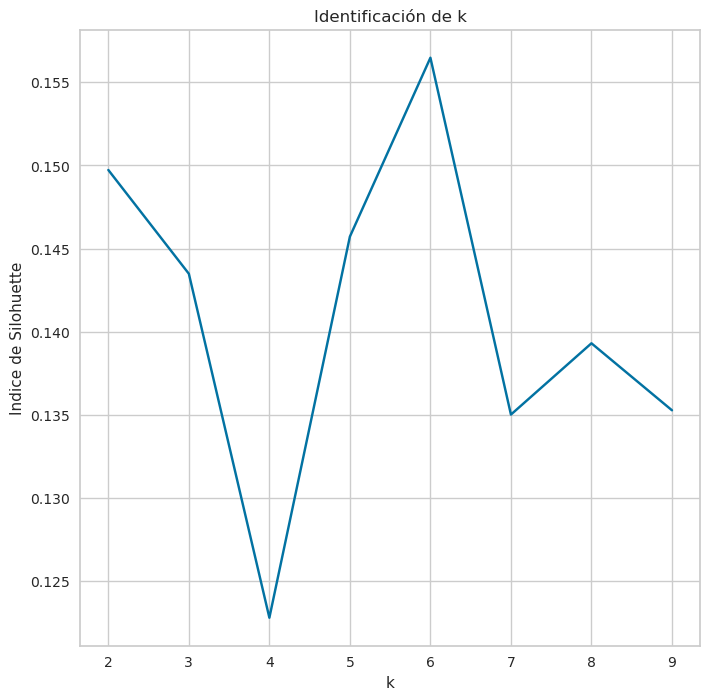

In [98]:
numeroCluster = range(2, 10)
valoresIndice = []

for n_cluster in numeroCluster:
  modeloKmeans = KMeans(n_clusters = n_cluster, random_state = 123, n_init = 25)
  labels = modeloKmeans.fit_predict(datosPro)
  mediaSilohuette = silhouette_score(datosPro, labels)
  valoresIndice.append(mediaSilohuette)

plt.figure(figsize = (8, 8))
plt.plot(numeroCluster, valoresIndice, 'bx-')
plt.title('Identificación de k')
plt.xlabel('k')
plt.ylabel('Indice de Silohuette')
plt.show()

## **Modelado**

In [99]:
modelo_final = KMeans(n_clusters = 6, random_state = 123, n_init = 25)
modelo_final.fit(datosPro)
grupos = modelo_final.predict(datosPro)
datosGrupos = datos
datosGrupos['Grupo KMeans'] = grupos

In [100]:
centros = pd.DataFrame(modelo_final.cluster_centers_)
centros.columns = np.concatenate([numCols, codCat])
centros

Edad  Ingresos  Numero_Compras    Gastos  Monto_Compras  \
0  0.494381  0.204698        0.498428  0.241113       0.498125   
1  0.500017  0.202832        0.500867  0.238351       0.515737   
2  0.506782  0.201767        0.498941  0.231569       0.500780   
3  0.503495  0.199732        0.498803  0.230157       0.501393   
4  0.498713  0.197780        0.500800  0.233258       0.466883   
5  0.504615  0.201227        0.498188  0.232072       0.488031   

   Cantidad_Quejas  Nivel_Satisfaccion_Alto  Nivel_Satisfaccion_Bajo  \
0         0.484801                 0.275157                 0.161950   
1         0.508088                 0.240901                 0.298094   
2         0.490315                 0.289346                 0.331719   
3         0.503723                 0.263830                 0.302128   
4         0.523099                 0.302772                 0.313433   
5         0.503321                 0.266304                 0.166667   

   Nivel_Satisfaccion_Medio  Nivel_Satisfaccion_Muy_Alto  ...  \
0                  0.198113                     0.220126  ...   
1                  0.221837                     0.136915  ...   
2                  0.271186                     0.084746  ...   
3                  0.263830                     0.098936  ...   
4                  0.187633                     0.159915  ...   
5                  0.213768                     0.219203  ...   

   Ubicacion_Tunja  Ubicacion_Villavicencio  Tipo_Cliente_Habitual  \
0         0.095912                 0.110063           3.490566e-01   
1         0.074523                 0.069324           5.551115e-17   
2         0.009685                 0.023002           1.000000e+00   
3         0.043617                 0.034043           6.661338e-16   
4         0.046908                 0.055437           1.000000e+00   
5         0.074275                 0.088768           3.170290e-01   

   Tipo_Cliente_Leal  Tipo_Cliente_Nuevo  Tipo_Cliente_Recurrente  \
0       4.716981e-02        4.528302e-01             1.509434e-01   
1       3.812825e-02        8.145581e-01             1.473137e-01   
2      -4.163336e-17        3.885781e-16             8.326673e-17   
3       3.510638e-02        8.734043e-01             9.148936e-02   
4      -1.734723e-17        3.330669e-16             9.714451e-17   
5       5.434783e-02        4.547101e-01             1.739130e-01   

   Genero_Hombre  Genero_Mujer    Captado_No    Captado_Si  
0   2.220446e-16  1.000000e+00  1.000000e+00  0.000000e+00  
1   1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
2   1.665335e-16  1.000000e+00 -2.220446e-16  1.000000e+00  
3   1.665335e-16  1.000000e+00 -3.330669e-16  1.000000e+00  
4   1.000000e+00 -1.110223e-16  0.000000e+00  1.000000e+00  
5   1.000000e+00 -1.110223e-16  1.000000e+00  3.330669e-16  

[6 rows x 27 columns]

In [101]:
numInverseTransformer = preprocesador.named_transformers_['num']['scaler']
centNumInvTrans = numInverseTransformer.inverse_transform(centros[numCols])
catInverseTransformer = preprocesador.named_transformers_['cat']['onehot']
centCatInvTrans = catInverseTransformer.inverse_transform(centros[codCat])

In [102]:
centros_transformados = pd.DataFrame(np.concatenate([centNumInvTrans, centCatInvTrans], axis = 1), columns = np.concatenate([numCols, catCols]))
centros_transformados

Edad        Ingresos Numero_Compras         Gastos   Monto_Compras  \
0  41.755031  5777375.701101       6.987421  793692.276887   1205811.34434   
1  41.950607  5741782.210399       7.006932  787298.235702   1232224.62565   
2  42.185351  5721449.015617       6.991525  771593.374092  1209792.824455   
3  42.071277  5682624.960213       6.990426  768324.106489  1210713.154255   
4   41.90533   5645384.56162       7.006397  775504.317484  1158958.673774   
5  42.110145  5711163.104348       6.985507  772757.488225  1190674.018116   

  Cantidad_Quejas Nivel_Satisfaccion Ubicacion Tipo_Cliente  Genero Captado  
0        2.908805               Alto    Bogotá        Nuevo   Mujer      No  
1        3.048527               Bajo  Medellín        Nuevo  Hombre      Si  
2        2.941889               Bajo  Medellín     Habitual   Mujer      Si  
3         3.02234               Bajo  Medellín        Nuevo   Mujer      Si  
4        3.138593               Bajo  Medellín     Habitual  Hombre      Si  
5        3.019928               Alto    Bogotá        Nuevo  Hombre      No

In [103]:
datosGrupos

Edad   Ingresos  Numero_Compras     Gastos Nivel_Satisfaccion  \
51853  38.1  5912777.8             5.0   994682.7              Medio   
69644  48.5  5127957.4             4.0  1104842.8               Alto   
38911  40.8  6040650.5             7.0   499844.9           Muy_Alto   
64322  43.5  4400358.9             7.0   472187.3               Alto   
58390  38.6  6876699.9             6.0  1473611.7           Muy_Alto   
...     ...        ...             ...        ...                ...   
72997  32.2  4531617.3             7.0  1190092.1              Medio   
31626  37.3  7913996.3             9.0   557192.7              Medio   
99034  44.9  4900075.6             7.0   445759.5           Muy_Alto   
75257  44.7  6038230.4             7.0  1822553.7               Alto   
49081  44.8  4259911.6             6.0   761523.4               Alto   

          Ubicacion Tipo_Cliente  Monto_Compras  Genero Captado  \
51853      Medellín        Nuevo         749847   Mujer      Si   
69644   Santa Marta     Habitual         490980   Mujer      No   
38911      Medellín     Habitual         571785   Mujer      Si   
64322  Barranquilla        Nuevo         641204   Mujer      Si   
58390      Medellín        Nuevo         514520   Mujer      No   
...             ...          ...            ...     ...     ...   
72997   Bucaramanga        Nuevo        1758473  Hombre      Si   
31626      Medellín     Habitual         618740  Hombre      Si   
99034   Bucaramanga     Habitual         929145   Mujer      Si   
75257        Bogotá        Nuevo        1644309  Hombre      Si   
49081        Bogotá     Habitual        1358451   Mujer      Si   

       Cantidad_Quejas  Grupo KMeans  
51853                2             3  
69644                1             0  
38911                3             2  
64322                5             3  
58390                6             0  
...                ...           ...  
72997                1             1  
31626                6             4  
99034                3             2  
75257                6             1  
49081                5             2  

[4000 rows x 12 columns]

In [104]:
datosGrupos['Grupo KMeans'].value_counts()

3    940
2    826
0    636
1    577
5    552
4    469
Name: Grupo KMeans, dtype: int64

In [105]:
fig = px.scatter_3d(data_frame = datosGrupos, x = 'Ingresos', y = 'Gastos', z = 'Edad', color = 'Grupo KMeans')
fig.show()

## **Agrupamiento Jerárquico**

In [106]:
#Función para dibujar un dendograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [107]:
cluster_ward = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', n_clusters = None, distance_threshold = 0)
cluster_ward.fit(datosPro)

AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

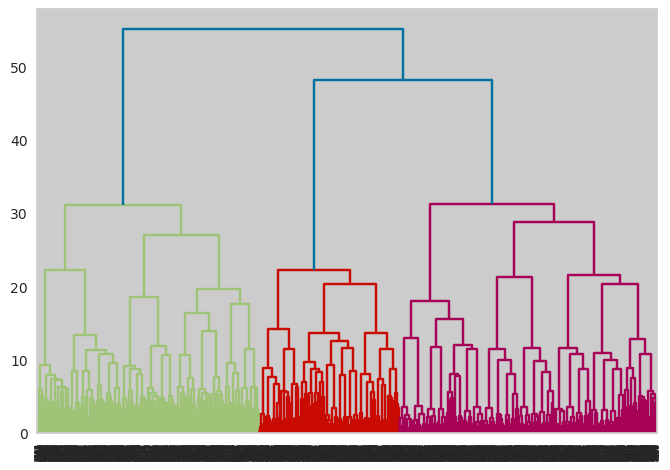

In [108]:
dibujarDendrograma(cluster_ward)
plt.show()

In [109]:
modelo_final_jerarquico = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', n_clusters = 4)
modelo_final_jerarquico.fit(datosPro)
labels = modelo_final_jerarquico.labels_
datosGrupos['Grupo Jerarquico'] = labels
datosGrupos

Edad   Ingresos  Numero_Compras     Gastos Nivel_Satisfaccion  \
51853  38.1  5912777.8             5.0   994682.7              Medio   
69644  48.5  5127957.4             4.0  1104842.8               Alto   
38911  40.8  6040650.5             7.0   499844.9           Muy_Alto   
64322  43.5  4400358.9             7.0   472187.3               Alto   
58390  38.6  6876699.9             6.0  1473611.7           Muy_Alto   
...     ...        ...             ...        ...                ...   
72997  32.2  4531617.3             7.0  1190092.1              Medio   
31626  37.3  7913996.3             9.0   557192.7              Medio   
99034  44.9  4900075.6             7.0   445759.5           Muy_Alto   
75257  44.7  6038230.4             7.0  1822553.7               Alto   
49081  44.8  4259911.6             6.0   761523.4               Alto   

          Ubicacion Tipo_Cliente  Monto_Compras  Genero Captado  \
51853      Medellín        Nuevo         749847   Mujer      Si   
69644   Santa Marta     Habitual         490980   Mujer      No   
38911      Medellín     Habitual         571785   Mujer      Si   
64322  Barranquilla        Nuevo         641204   Mujer      Si   
58390      Medellín        Nuevo         514520   Mujer      No   
...             ...          ...            ...     ...     ...   
72997   Bucaramanga        Nuevo        1758473  Hombre      Si   
31626      Medellín     Habitual         618740  Hombre      Si   
99034   Bucaramanga     Habitual         929145   Mujer      Si   
75257        Bogotá        Nuevo        1644309  Hombre      Si   
49081        Bogotá     Habitual        1358451   Mujer      Si   

       Cantidad_Quejas  Grupo KMeans  Grupo Jerarquico  
51853                2             3                 1  
69644                1             0                 0  
38911                3             2                 1  
64322                5             3                 1  
58390                6             0                 0  
...                ...           ...               ...  
72997                1             1                 2  
31626                6             4                 2  
99034                3             2                 1  
75257                6             1                 2  
49081                5             2                 1  

[4000 rows x 13 columns]

In [110]:
datosGrupos['Grupo Jerarquico'].value_counts()

0    1434
1    1122
2     903
3     541
Name: Grupo Jerarquico, dtype: int64

In [111]:
fig = px.scatter_3d(data_frame = datosGrupos, x = 'Ingresos', y = 'Gastos', z = 'Edad', color = 'Grupo Jerarquico')
fig.show()

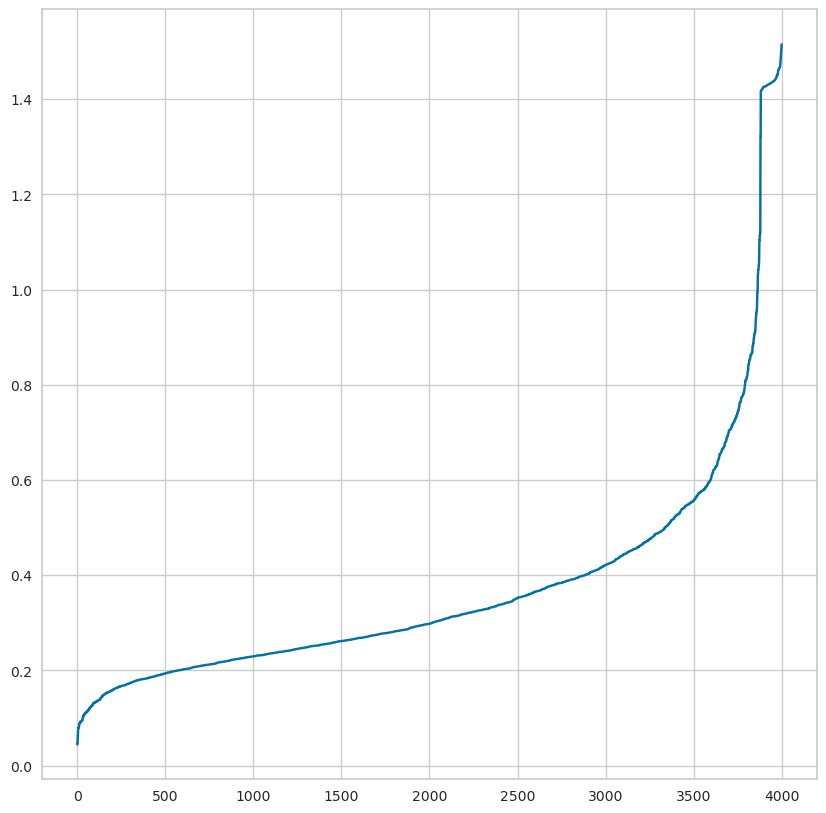

In [112]:
#Identificar rango de distancias para epsilon
neighbors = NearestNeighbors(n_neighbors = 3)
neighbors_fit = neighbors.fit(datosPro)
distances, indice = neighbors_fit.kneighbors(datosPro)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize = (10, 10))
plt.plot(distances)
plt.show()

In [113]:
valores_eps = np.arange(0.4, 1.2, 0.1)
min_muestras = np.arange(2,10)
parametros = list(product(valores_eps, min_muestras))
sil_score = []
for p in parametros:
  y_pred = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(datosPro)
  sil_score.append(silhouette_score(datosPro, y_pred))

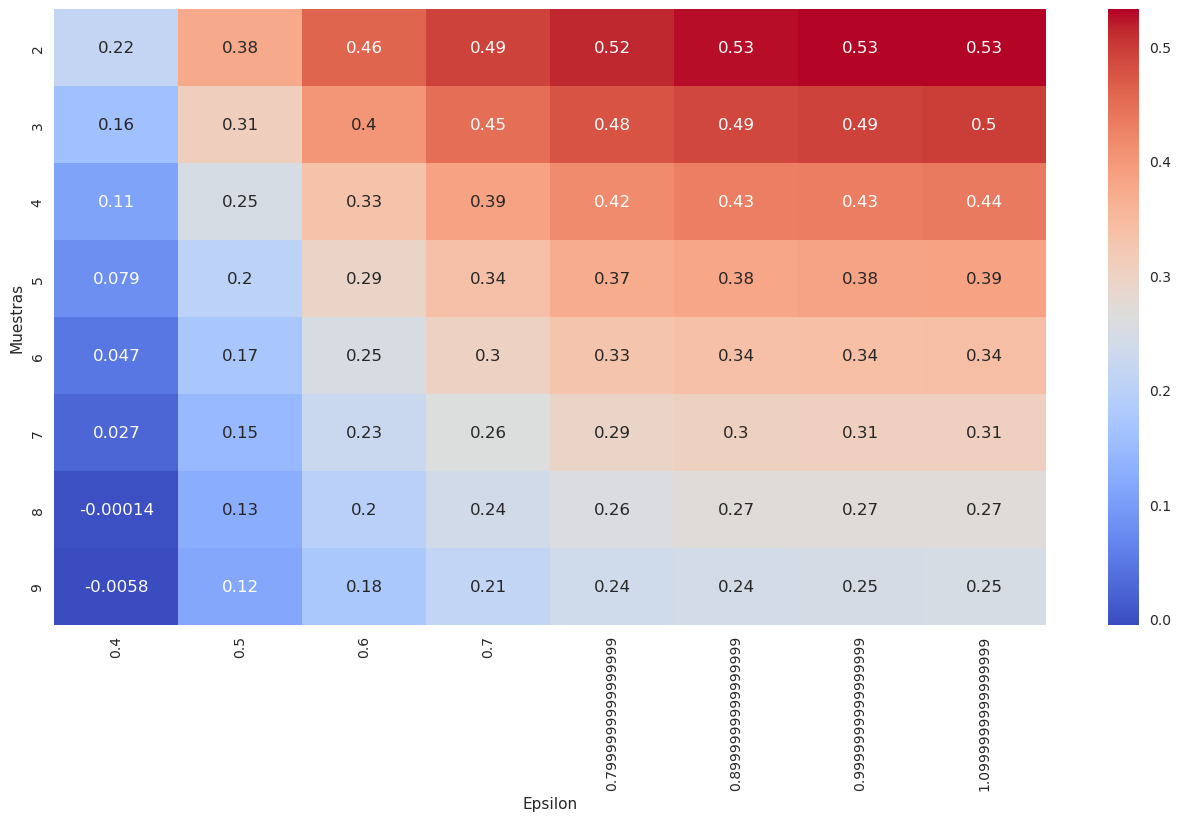

In [114]:
df_ajuste_parametros = pd.DataFrame.from_records(parametros, columns = ['Epsilon', 'Muestras'])
df_ajuste_parametros['Score'] = sil_score
datos_cruzados = pd.pivot_table(df_ajuste_parametros, values = 'Score', index = 'Muestras', columns = 'Epsilon')
plt.figure(figsize = (16, 8))
sb.heatmap(datos_cruzados, annot = True, fmt = '.2g', cmap = 'coolwarm')
plt.show()

In [115]:
modelo_final_dbscan = DBSCAN(eps = 1, min_samples = 3)
grupos = modelo_final_dbscan.fit_predict(datosPro)
datosGrupos['Grupo DBSCAN'] = grupos
datosGrupos

Edad   Ingresos  Numero_Compras     Gastos Nivel_Satisfaccion  \
51853  38.1  5912777.8             5.0   994682.7              Medio   
69644  48.5  5127957.4             4.0  1104842.8               Alto   
38911  40.8  6040650.5             7.0   499844.9           Muy_Alto   
64322  43.5  4400358.9             7.0   472187.3               Alto   
58390  38.6  6876699.9             6.0  1473611.7           Muy_Alto   
...     ...        ...             ...        ...                ...   
72997  32.2  4531617.3             7.0  1190092.1              Medio   
31626  37.3  7913996.3             9.0   557192.7              Medio   
99034  44.9  4900075.6             7.0   445759.5           Muy_Alto   
75257  44.7  6038230.4             7.0  1822553.7               Alto   
49081  44.8  4259911.6             6.0   761523.4               Alto   

          Ubicacion Tipo_Cliente  Monto_Compras  Genero Captado  \
51853      Medellín        Nuevo         749847   Mujer      Si   
69644   Santa Marta     Habitual         490980   Mujer      No   
38911      Medellín     Habitual         571785   Mujer      Si   
64322  Barranquilla        Nuevo         641204   Mujer      Si   
58390      Medellín        Nuevo         514520   Mujer      No   
...             ...          ...            ...     ...     ...   
72997   Bucaramanga        Nuevo        1758473  Hombre      Si   
31626      Medellín     Habitual         618740  Hombre      Si   
99034   Bucaramanga     Habitual         929145   Mujer      Si   
75257        Bogotá        Nuevo        1644309  Hombre      Si   
49081        Bogotá     Habitual        1358451   Mujer      Si   

       Cantidad_Quejas  Grupo KMeans  Grupo Jerarquico  Grupo DBSCAN  
51853                2             3                 1             0  
69644                1             0                 0             1  
38911                3             2                 1             2  
64322                5             3                 1             3  
58390                6             0                 0             4  
...                ...           ...               ...           ...  
72997                1             1                 2           225  
31626                6             4                 2           101  
99034                3             2                 1           291  
75257                6             1                 2           109  
49081                5             2                 1            28  

[4000 rows x 14 columns]

In [116]:
datosGrupos['Grupo DBSCAN'].value_counts()

-1      301
 29      89
 0       81
 45      80
 16      76
       ... 
 241      3
 38       3
 41       3
 196      3
 332      3
Name: Grupo DBSCAN, Length: 343, dtype: int64

In [117]:
fig = px.scatter_3d(data_frame = datosGrupos, x = 'Ingresos', y = 'Gastos', z = 'Edad', color = 'Grupo DBSCAN')
fig.show()

## **Definición del método**

In [118]:
indice_k = silhouette_score(datosPro, modelo_final.predict(datosPro))
indice_jerarquico = silhouette_score(datosPro, modelo_final_jerarquico.fit_predict(datosPro))
indice_dbscan = silhouette_score(datosPro, modelo_final_dbscan.fit_predict(datosPro))

In [119]:
print(f'El indice de silhouette para el método KMeans es: {indice_k}')
print(f'El indice de silhouette para el método Jerárquico es: {indice_jerarquico}')
print(f'El indice de silhouette para el método DBSCAN es: {indice_dbscan}')

El indice de silhouette para el método KMeans es: 0.15647543367021427
El indice de silhouette para el método Jerárquico es: 0.08182207295668888
El indice de silhouette para el método DBSCAN es: 0.4929216363396213
